# **Music Recommendation System**

## **Problem Definition**

Welcome to the project on Recommendation Systems. We will work with the Music recommendation System. It has two dataset songs and count. It does not include information about the products or reviews to avoid bias while building the model.



### **The Context:**

*Why is this problem important to solve?*

As of 2022, there are approximately 82 million songs according to Spotify, 200 million songs according to Gracenote, and between 97 million to 230 million according to Google.

As per billboard and other sites over 100k songs gets released.
https://www.billboard.com/pro/how-much-music-added-spotify-streaming-services-daily/

Songs of all genres are growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for any music listeners. Imagine the pain of any music listner. From this 82 million songs they have to decided which language, and genre of songs they should listen.

Recommender Systems are one of the best tools that help recommending songs as per their likings and genres to listeners while they are browsing online. Providing personalized recommendations songs which is most relevant to them is what's most likely to keep them engaged and enhance their experience.

There are many music app which are used by listners to enjoy music of their taste like spotify, apple music, youtube and amazon music  and all use different recommendation models to provide personalized suggestions to different listeners. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

### **The objective:**

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.


### **The key questions:**

- What are the key questions that need to be answered?
1. What types of music do users prefer?
2. How do users discover new music?
3. Do users prefer popular tracks or niche genres?
4. Are there specific artists or bands that users frequently listen to?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
1. Personalize recommendations to all listeners
2. New muisc recommendation to all listeners

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ROOT_PATH = '/content/drive/MyDrive/Capstone_Project'
!pwd

/content


In [3]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [4]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Capstone_Project/count_data.csv', na_values="na")
song_df = pd.read_csv('/content/drive/MyDrive/Capstone_Project/song_data.csv', na_values="na")

### **Understanding the data by viewing a few observations**

In [5]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [6]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


### **Let us check the data types and and missing values of each column**

In [7]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [8]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999982 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:_____________**
1. Count dataset has 2 Million records
2. Song dataset has 1 Millon Records

In [9]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously

# song_df_unique = song_df.drop_duplicates(subset='song_id', keep='first')
# df = count_df.merge(song_df_unique,on = 'song_id', how = 'left')

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df.drop('Unnamed: 0',axis = 1, inplace = True)

# Name the obtained dataframe as "df"
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [10]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999982 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [11]:
## Name the obtained dataframe as "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 106.8+ MB


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [12]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

In [13]:
# Encode user_id and song_id
df['user_id_enc'] = le.fit_transform(df['user_id'])
df['song_id_enc'] = le.fit_transform(df['song_id'])

In [14]:
df

,user_id,song_id,play_count,title,release,artist_name,year,user_id_enc,song_id_enc
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,54961,153
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,54961,413
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,54961,736
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,54961,750
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,54961,1188
...,...,...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0,64590,3660
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009,64590,3736
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007,64590,3744
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010,64590,3893


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
 7   user_id_enc  int64 
 8   song_id_enc  int64 
dtypes: int64(4), object(5)
memory usage: 137.3+ MB


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [16]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
user_play_count = dict()
for user in users:
    # If we already have the user, just add 1 to their play count
    if user in user_play_count:
        user_play_count[user] += 1
    # Otherwise, set their play count to 1
    else:
        user_play_count[user] = 1

In [17]:
# We want our users to have listened at least 90 songs
PLAY_COUNT_CUTOFF = 90
remove_users = []
for user, num_counts in user_play_count.items():
    if num_counts < PLAY_COUNT_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [18]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
songs_play_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in songs_play_count:
        songs_play_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        songs_play_count[song] = 1

In [19]:
# We want our song to be listened by atleast 120 users to be considred

SONGS_COUNT_CUTOFF = 120
remove_songs = []
for song, num_ratings in songs_play_count.items():
    if num_ratings < SONGS_COUNT_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [20]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count <= 5]

In [21]:
# Check the shape of the data
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117876 entries, 200 to 1999765
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  object
 1   song_id      117876 non-null  object
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
 7   user_id_enc  117876 non-null  int64 
 8   song_id_enc  117876 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 9.0+ MB


In [22]:
df_final

,user_id,song_id,play_count,title,release,artist_name,year,user_id_enc,song_id_enc
200,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence,Distillation,Erin McKeown,2000,6958,447
202,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,6958,512
203,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBKRVG12A8C133269,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,6958,549
204,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBUBLL12A58A795A8,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,6958,703
205,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBVKFF12A8C137A79,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,6958,719
...,...,...,...,...,...,...,...,...,...
1999734,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOXNZOW12AB017F756,1,Half Of My Heart,Battle Studies,John Mayer,0,47786,9139
1999736,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOXQYSC12A6310E908,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,47786,9186
1999745,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOYDTIW12A67ADAFC9,2,The Police And The Private,Live It Out,Metric,2005,47786,9351
1999755,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOYQQAC12A6D4FD59E,1,Just Friends,Back To Black,Amy Winehouse,2006,47786,9543


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [23]:
# Display total number of unique user_id
df_final.user_id.nunique()

3155

In [24]:
# Display top  5 unique user_id and their counts
df_final.user_id.value_counts().head(5)

user_id
ce5c912bb8044f23fc0fc31bd986b8d0a7303db5    243
34e191b5e3ac4d0b86b100e3325aa46c34998248    227
7c80116b2a5c6602ca60fc40ef932e12fd304a69    202
2078b23380f2a80615fb9829621f7dc6cc6c7a82    184
4e3398ef89d9c00975d0b0f5b7bc7b7f067c7902    177
Name: count, dtype: int64

Total number of unique song id

In [25]:
# Display total number of unique song_id
df_final.song_id.nunique()

563

In [26]:
# Display total number of unique song_id_enc
df_final.song_id.value_counts().head(5)

song_id
SOWCKVR12A8C142411    751
SOAXGDH12A8C13F8A1    748
SOFRQTD12A81C233C0    713
SOCVTLJ12A6310F0FD    662
SOKLRPJ12A8C13C3FE    652
Name: count, dtype: int64

Total number of unique artists

In [27]:
# Display total number of unique artists
df_final.artist_name.nunique()

232

#### **Observations and Insights:__________**
1. df_final has in total 117k records
2. We have 3155 unique user id of which
3. We have 563 unique songs
2. We have in total 232 unique artist

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [28]:
a= df_final.song_id.value_counts().head(1)
a

song_id
SOWCKVR12A8C142411    751
Name: count, dtype: int64

In [29]:
df_final[df_final.song_id == 'SOWCKVR12A8C142411'][['song_id','title','release','artist_name','year']].head(1)

,song_id,title,release,artist_name,year
1000,SOWCKVR12A8C142411,Use Somebody,Use Somebody,Kings Of Leon,2008


Most interacted users

In [30]:
df_final.user_id.value_counts().head(1)

user_id
ce5c912bb8044f23fc0fc31bd986b8d0a7303db5    243
Name: count, dtype: int64

In [31]:
df_final[df_final.user_id == 'ce5c912bb8044f23fc0fc31bd986b8d0a7303db5'][['user_id']].head(1)

,user_id
1495992,ce5c912bb8044f23fc0fc31bd986b8d0a7303db5


#### **Observations and Insights:_______**

1. Most interacted songs being "Use Somebody" released in 2008 of Artist "Kings of Leon".

2. Most Interacted user_id is "ce5c912bb8044f23fc0fc31bd986b8d0a7303db5"


In [32]:
df_final[df_final.year == 1969].count()

user_id        238
song_id        238
play_count     238
title          238
release        238
artist_name    238
year           238
user_id_enc    238
song_id_enc    238
dtype: int64

Songs played in a year

In [33]:
# Find out the number of songs played in a year
  # Hint: Use groupby function on the 'year' column

 # below will qive number of unique songs played each year

df_final.groupby(['year'])['song_id'].nunique().sort_values( ascending = False)

year
0       85
2007    79
2008    67
2009    65
2006    43
2003    42
2005    29
2000    22
2002    22
2010    16
2001    15
2004    13
1999     8
1991     7
1992     5
1986     5
1997     5
1993     5
1994     4
1996     3
1988     3
1969     2
1979     2
1974     2
1976     2
1982     1
1970     1
1971     1
1973     1
1975     1
1978     1
1990     1
1983     1
1987     1
1981     1
1995     1
1980     1
Name: song_id, dtype: int64

In [34]:
# below will qive total number of songs played each year

df_final.groupby('year')['song_id'].count()

year
0       20649
1969      238
1970      109
1971      133
1973      270
1974      583
1975      173
1976      478
1978      119
1979      220
1980      234
1981      144
1982      126
1983      110
1986     1105
1987      336
1988      569
1990      373
1991     1338
1992      849
1993     1214
1994      504
1995      206
1996      502
1997     1439
1999     1652
2000     4834
2001     2805
2002     5135
2003     7928
2004     2314
2005     5376
2006     7592
2007    13750
2008    14031
2009    16351
2010     4087
Name: song_id, dtype: int64

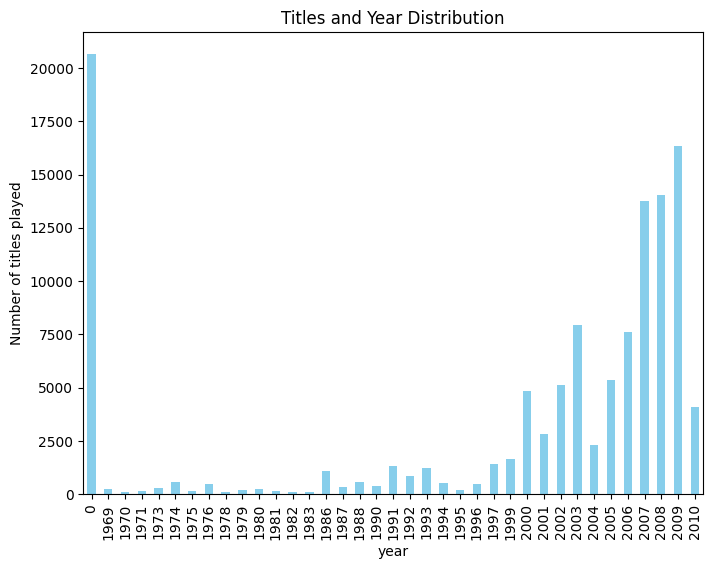

In [35]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
titles_per_year = df_final.groupby(['year'])['title'].count()


# Set the figure size
plt.figure(figsize=(8, 6))

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of titles played')

# Show the plot
plt.title('Titles and Year Distribution')
titles_per_year.plot(kind = 'bar', color ='skyblue')
plt.tight_layout
plt.show()

#### **Observations and Insights:__________** #

**Think About It:** What other insights can be drawn using exploratory data analysis?

1. We can see that as year progressed, count of title played is more which means listeners are listening to more songs released post 2000 then prior.

2. There are very less songs played of titles released prior to 2000 gives a possibility we have more younger generation listeners using spotify and have  given the ratings.

2. 2004 might not have better titles release due to which we see a dip in count.

3. Count of 2010 could be less as we would have gathered data before 2010 has actually ended.

4. 2009 has the hightest count with second highest being 2008 and then 2007 indicates listeners are actually listening to latest songs released.


Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

In [36]:
df_final

,user_id,song_id,play_count,title,release,artist_name,year,user_id_enc,song_id_enc
200,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence,Distillation,Erin McKeown,2000,6958,447
202,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,6958,512
203,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBKRVG12A8C133269,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,6958,549
204,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBUBLL12A58A795A8,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,6958,703
205,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBVKFF12A8C137A79,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,6958,719
...,...,...,...,...,...,...,...,...,...
1999734,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOXNZOW12AB017F756,1,Half Of My Heart,Battle Studies,John Mayer,0,47786,9139
1999736,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOXQYSC12A6310E908,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,47786,9186
1999745,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOYDTIW12A67ADAFC9,2,The Police And The Private,Live It Out,Metric,2005,47786,9351
1999755,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOYQQAC12A6D4FD59E,1,Just Friends,Back To Black,Amy Winehouse,2006,47786,9543


In [37]:
df_final[df_final.song_id == 'SOAFQGA12A8C1367FA'].play_count

4644       1
8670       3
14689      2
49562      1
75741      2
          ..
1934820    1
1944504    5
1965297    1
1981676    1
1989346    3
Name: play_count, Length: 115, dtype: int64

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [38]:
# Calculating average play_count
    # Hint: Use groupby function on the song_id column

average_song_play_count = df_final.groupby(['song_id'])['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
freq_song_play_count = df_final.groupby(['song_id'])['play_count'].count()

In [39]:
# Making a dataframe with the average_count and play_freq
final_song_play_count = pd.DataFrame({'average_song_play_count':average_song_play_count,'freq_song_play_count':freq_song_play_count})
# Let us see the first five records of the final_play dataset
final_song_play_count.head(5)


,average_song_play_count,freq_song_play_count
song_id,,
SOABJBU12A8C13F63F,1.622642,265
SOABJTC12A58A7DE0E,1.492424,132
SOADJQJ12A8C141D38,1.729216,421
SOADQPP12A67020C82,1.728070,114
SOAFQGA12A8C1367FA,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [40]:
# Build the function to find top n songs

def topn_songs(nsongs,nplaycount):
  df1 = final_song_play_count[final_song_play_count['freq_song_play_count'] > nplaycount]
  df2= df1.sort_values('average_song_play_count',ascending= False).head(nsongs)
  return df2.index[:nsongs]

In [41]:
# Recommend top 10 songs which has atleast been played 250 times using the function defined above
list(topn_songs(10,250))

['SONYKOW12AB01849C9',
 'SOFRQTD12A81C233C0',
 'SOBONKR12A58A7A7E0',
 'SOAXGDH12A8C13F8A1',
 'SOEGIYH12A6D4FC0E3',
 'SOPUCYA12A8C13A694',
 'SOLFXKT12AB017E3E0',
 'SODJWHY12A8C142CCE',
 'SOTCMDJ12A6D4F8528',
 'SOUFTBI12AB0183F65']

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [42]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162984 sha256=66a9ff5106065a720e624ce74be0e4f534ba2afc2ead678f14720e3729f2df44
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [43]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic
# from surprise import KNNBasic

# from surprise import similarity
from sklearn.metrics.pairwise import cosine_similarity

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering



### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [44]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [45]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)

reader = Reader(rating_scale=(0,5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[["user_id","song_id", "play_count"]], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

In [46]:
data

**Think About It:** How changing the test size would change the results and outputs?

In [47]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine','user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:_________**

1. RMSE is 1.0878.
2. Intuition of Precision: We are getting a precision of ~ 0.396, which means out of all the recommended product 39.6% are relevant.
3. Intuition of Recall: We are getting a recall of ~0.692, which means out of all the relevant songs, 69.2% are recommended.
4. Here F_1 score of the baseline model is ~0.504. It indicates that mostly recommended products were relevant and relevant products were recommended.

In [48]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict('17aa9f6dbdf753831da8f38c71b66b64373de613','SOOAVGC12AB01821EC', verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOOAVGC12AB01821EC r_ui = None   est = 2.02   {'actual_k': 40, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOOAVGC12AB01821EC', r_ui=None, est=2.023732907027286, details={'actual_k': 40, 'was_impossible': False})

In [49]:
a1= df_final[(df_final.user_id=='17aa9f6dbdf753831da8f38c71b66b64373de613') &(df_final.song_id=='SOOAVGC12AB01821EC')]
a1

,user_id,song_id,play_count,title,release,artist_name,year,user_id_enc,song_id_enc
269,17aa9f6dbdf753831da8f38c71b66b64373de613,SOOAVGC12AB01821EC,5,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,6958,5566


In [50]:
list1= list(df_final[df_final.user_id=='17aa9f6dbdf753831da8f38c71b66b64373de613'].song_id) # all songs played by user
list2= list(df_final.song_id) # total songs we have in the set
song_not_in_list = next((x for x in list2 if x not in list1), None) # finding 1 song which has not be listened by the user
print(song_not_in_list)

SOAFTRR12AF72A8D4D


In [51]:
df_final[df_final.song_id=='SOOAVGC12AB01821EC']

,user_id,song_id,play_count,title,release,artist_name,year,user_id_enc,song_id_enc
269,17aa9f6dbdf753831da8f38c71b66b64373de613,SOOAVGC12AB01821EC,5,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,6958,5566
5446,12a4a991c8b53cd6906995caed8b1f2bd3b6436a,SOOAVGC12AB01821EC,1,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,5480,5566
16032,8e8b32a1621d2950fe9a6384d8fb594fd25525df,SOOAVGC12AB01821EC,1,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,42536,5566
22205,f950c72da3617fe94a02c753dfeedb5a7acf6def,SOOAVGC12AB01821EC,3,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,74334,5566
43504,9fbece735fbba4ea0a3f6618777ed4e8873bf6b7,SOOAVGC12AB01821EC,3,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,47806,5566
...,...,...,...,...,...,...,...,...,...
1885532,633a89f69fa56ffc0643831d9840c60af01f42e9,SOOAVGC12AB01821EC,1,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,29512,5566
1896715,9684f0e8e589e8fba3032d850517ff32d2debb90,SOOAVGC12AB01821EC,1,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,44979,5566
1959117,857302c47ddc784fd2be13db154fe8341a6d7d61,SOOAVGC12AB01821EC,1,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,39778,5566
1971924,24b98f8ab023f6e7a1c37c7729c623f7b821eb95,SOOAVGC12AB01821EC,1,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003,10807,5566


In [52]:
df_final[df_final.song_id=='SOAFTRR12AF72A8D4D']

,user_id,song_id,play_count,title,release,artist_name,year,user_id_enc,song_id_enc
351,5a905f000fc1ff3df7ca807d57edb608863db05d,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,27018,97
1176,a58de017cbeda1763ea002fe027ed41b4ed53109,SOAFTRR12AF72A8D4D,3,Harder Better Faster Stronger,Discovery,Daft Punk,2007,49549,97
3748,884209a41deb55df792f074bccf8af1c1c31768b,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,40583,97
8671,c24ec42f0e449ff39a95a01f0795f833b898f71b,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,57932,97
16136,7f4c09f1e5b09f9f1f14a42708df71b44feb30e1,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,37938,97
...,...,...,...,...,...,...,...,...,...
1971621,24b98f8ab023f6e7a1c37c7729c623f7b821eb95,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,10807,97
1990807,b6923b6ecfe0e09ac26797e02b92554e97d1b7ff,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,54568,97
1994123,670753f89120524bd632045d38289662347ecd72,SOAFTRR12AF72A8D4D,2,Harder Better Faster Stronger,Discovery,Daft Punk,2007,30647,97
1995023,2078b23380f2a80615fb9829621f7dc6cc6c7a82,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007,9570,97


In [53]:
# Predicting play_count for a sample user with a song not-listened by the user
# predict play_count for any sample user
sim_user_user.predict('17aa9f6dbdf753831da8f38c71b66b64373de613','SOAFTRR12AF72A8D4D', verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOAFTRR12AF72A8D4D r_ui = None   est = 1.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOAFTRR12AF72A8D4D', r_ui=None, est=1.55, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**

1. The above predicted playcount for this user_id = 17aa9f6dbdf753831da8f38c71b66b64373de613"  and song_id "SOOAVGC12AB01821EC" pair, is 2.02 by this user-user-similarity-based baseline model. but actual playcount can be seen is 5 which is not good prediction.

2. The above predicted playcount for this user_id = 17aa9f6dbdf753831da8f38c71b66b64373de613" and song_id "SOAFTRR12AF72A8D4D" pair, is 1.55 by this user-user-similarity-based baseline model.

Now, let's try to tune the model and see if we can improve the model performance.

In [54]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],'sim_options': {'name': ['msd', 'cosine'],'user_based': [True]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0573396316095962
{'k': 50, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [55]:
# Train the best model found in above gridsearch

# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd','user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0596
Precision:  0.414
Recall:  0.623
F_1 score:  0.497


**Observations and Insights:_________**

After tuning hyperparameters,

1. the RMSE of the model has gone down slightly from 1.0878 to 1.00596
2. Precision has increased  from 0.396 to 0.414.
3. Recall has Decreased from 0.692 to 0.623.
4. F_1 score of the tuned model has decreased slightly from .504 to .497.


Hence, we can say that the model performance has improved significantly with respect to Recall as relevant products are getting recommended after hyperparameter tuning.

In [56]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict('6958', '1671', r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [57]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)

sim_user_user_optimized.predict('6958', '97', verbose = True)

user: 6958       item: 97         r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='97', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**

1.  If we compare the predicted play_count  with the actual play_count, we can say that the predicted count by the tuned model(1.70) is closer to the actual rating(2).

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [58]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[31, 82, 90, 116, 125]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n songs** recommended for the given user_id based on the given algorithm

In [59]:
def get_recommendations(data, user_id, top_n, algo):

# Creating an empty list to store the recommended songs ids
  recommendations = []

# Creating an user songs interactions matrix
  user_song_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

# Extracting those songs ids which the user_id has not visited yet
  non_interacted_song = user_song_interactions_matrix.loc[user_id][user_song_interactions_matrix.loc[user_id].isnull()].index.tolist()

# Looping through each of the business ids which user_id has not interacted yet
  for song_id in non_interacted_song:
    # Predicting the play_count for those non visited song ids by this user
    est = algo.predict(user_id, song_id).est
    # Appending the predicted ratings
    recommendations.append((song_id, est))

# Sorting the predicted ratings in descending order
  recommendations.sort(key = lambda x: x[1], reverse = True)

  return  recommendations[:top_n]# Returing top n highest predicted playcount songs for this user

In [60]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final,'17aa9f6dbdf753831da8f38c71b66b64373de613',5,sim_user_user_optimized)

In [61]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_count'])

,song_id,predicted_count
0,SOSJSSU12A6D4F8F41,2.935235
1,SOQGSUC12A8C13B66D,2.668720
2,SOVIZNF12AF72A710A,2.467205
3,SOQGOPT12AAF3B2B27,2.386082
4,SOMDVSL12A6D4F7230,2.348859


**Observations and Insights:______________**
1. Predicted count has improved

In [62]:
recommendations

[('SOSJSSU12A6D4F8F41', 2.9352354645501686),
 ('SOQGSUC12A8C13B66D', 2.6687197801836477),
 ('SOVIZNF12AF72A710A', 2.467204888613006),
 ('SOQGOPT12AAF3B2B27', 2.3860823787498866),
 ('SOMDVSL12A6D4F7230', 2.348858948867852)]

### Correcting the play_counts and Ranking the above songs

In [63]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('freq_song_play_count', ascending = False)[['freq_song_play_count']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['freq_song_play_count'])
  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [64]:
# # Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_song_play_count)

,song_id,freq_song_play_count,predicted_play_count,corrected_play_count
1,SOSJSSU12A6D4F8F41,107,2.935235,2.838562
2,SOQGSUC12A8C13B66D,102,2.668720,2.569705
4,SOVIZNF12AF72A710A,96,2.467205,2.365143
0,SOQGOPT12AAF3B2B27,109,2.386082,2.290300
3,SOMDVSL12A6D4F7230,97,2.348859,2.247324


**Observations and Insights:______________**
1. Play count has improved or can be said decreased to more realistic values

### Item Item Similarity-based collaborative filtering recommendation systems

In [65]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine','item_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)
# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)
# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:______________**
1. RMSE is 1.0878.
2. Intuition of Recall: We are getting a recall of ~0.692, which means out of
   all the relevant product 69.2% are recommended.
3. Intuition of Precision: We are getting a precision of ~ 0.396, which means out of all the recommended product 39.6% are relevant.

4. Here F_1 score of the baseline model is ~0.504. It indicates that mostly recommended products were relevant and relevant products were recommended.

In [66]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958 , 1671 , r_ui = 1, verbose = True)

user: 6958       item: 1671       r_ui = 1.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=1671, r_ui=1, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [67]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6956, 1671,  verbose = True)

user: 6956       item: 1671       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6956, iid=1671, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**

1. Prediction remains the same with no major improvement

In [68]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],'sim_options': {'name': ['msd', 'cosine'],'user_based': [False]}}


# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0331757773121415
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [69]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'cosine','user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0398
Precision:  0.325
Recall:  0.587
F_1 score:  0.418


**Observations and Insights:______________**

1. RMSE is 1.0398 which has **improved**.

2. Intuition of Recall: We are getting a recall of ~0.587, which means out of all the relevant product 58.7% are recommended. **It has decreased**

3. Intuition of Precision: We are getting a precision of ~ 0.325, which means out of all the recommended product 32.5% are relevant. **It has decreased**.

4. Here F_1 score of the baseline model is ~0.418. It indicates that mostly recommended products were relevant and relevant products were recommended. **It has decreased**.



In [70]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 1, verbose = True)

user: 6958       item: 1671       r_ui = 1.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=1671, r_ui=1, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [71]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, r_ui = None, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**

1. Prediction remains the same

In [72]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[3, 10, 11, 24, 30]

In [73]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final,'17aa9f6dbdf753831da8f38c71b66b64373de613', 5, sim_item_item_optimized)

In [74]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,SOHEMBB12A6701E907,1.650010
1,SOUGCDK12AC95F075F,1.542349
2,SOEMUXL12A58A7B848,1.540675
3,SOLRDEI12A8C13AAA2,1.539257
4,SONQSBF12AF72ABB86,1.538866


In [75]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_song_play_count)

,song_id,freq_song_play_count,predicted_play_count,corrected_play_count
0,SOHEMBB12A6701E907,232,1.650010,1.584357
1,SOUGCDK12AC95F075F,220,1.542349,1.474929
2,SONQSBF12AF72ABB86,135,1.538866,1.452800
3,SOLRDEI12A8C13AAA2,120,1.539257,1.447970
4,SOEMUXL12A58A7B848,112,1.540675,1.446184


**Observations and Insights:_________**
1. Play count has improved or can be said decreased to more realistic values

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [76]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


**Observations and Insights:______________**

1. RMSE is 1.0252 which has **improved**.

2. Intuition of Recall: We are getting a recall of ~0.633, which means out of all the relevant product 63.3% are recommended. **It has Increased**

3. Intuition of Precision: We are getting a precision of ~ 0.41, which means out of all the recommended product 41.0% are relevant. **It has Increased**.

4. Here F_1 score of the baseline model is ~0.498. It indicates that mostly recommended products were relevant and relevant products were recommended. **It has Increased**.


In [79]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [80]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict("A2UOHALGF2X77Q", "3232", r_ui =None, verbose = True)

user: A2UOHALGF2X77Q item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [81]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0117023209255913
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [82]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:_________**

1. RMSE is 1.0141 which has improved.

2. Intuition of Recall: We are getting a recall of ~0.635, which means out of all the relevant product 63.3% are recommended. It has Increased

3. Intuition of Precision: We are getting a precision of ~ 0.415, which means out of all the recommended product 41.5% are relevant. It has Increased.

4. Here F_1 score of the baseline model is ~0.502. It indicates that mostly recommended products were relevant and relevant products were recommended. It has Increased.

In [83]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui =1 , verbose = True)

user: 6958       item: 1671       r_ui = 1.00   est = 1.70   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=1, est=1.6989607635206787, details={'was_impossible': False})

In [84]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

**Observations and Insights:_________**
1. Prediction remains the same

In [88]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, '17aa9f6dbdf753831da8f38c71b66b64373de613', 5, svd_optimized)

In [90]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, final_song_play_count)

,song_id,freq_song_play_count,predicted_play_count,corrected_play_count
2,SOSJSSU12A6D4F8F41,107,2.601899,2.505225
1,SOOGNOZ12AAF3B2936,108,2.108728,2.012502
4,SOVIZNF12AF72A710A,96,2.014091,1.912029
0,SOZVVRE12A8C143150,150,1.940115,1.858465
3,SOQGSUC12A8C13B66D,102,1.952493,1.853478


**Observations and Insights:_________**
1. Predicted play count of the song as well as the corrected_play_count has improved post SVD optimization.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [91]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [92]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 1, verbose = True)

user: 6958       item: 1671       r_ui = 1.00   est = 1.70   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=1, est=1.6989607635206787, details={'was_impossible': False})

In [93]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [94]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])


1.0449083169106668
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 30}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [95]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:_________**

1. RMSE is 1.0487.

2. Intuition of Recall: We are getting a recall of ~0.582, which means out of all the relevant product 58.2% are recommended.

3. Intuition of Precision: We are getting a precision of ~ 0.397, which means out of all the recommended product 39.7% are relevant.

4. Here F_1 score of the baseline model is ~0.472. It indicates that mostly recommended products were relevant and relevant products were recommended.

In [96]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 1, verbose = True)

user: 6958       item: 1671       r_ui = 1.00   est = 1.70   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=1, est=1.6989607635206787, details={'was_impossible': False})

In [97]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

**Observations and Insights:_________**

1. Prediction remains the same

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [103]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, '17aa9f6dbdf753831da8f38c71b66b64373de613', 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [104]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, final_song_play_count)

,song_id,freq_song_play_count,predicted_play_count,corrected_play_count
2,SOSJSSU12A6D4F8F41,107,3.094797,2.998124
4,SOVIZNF12AF72A710A,96,2.311498,2.209436
1,SOZVVRE12A8C143150,150,2.215039,2.133390
0,SONYKOW12AB01849C9,618,2.124563,2.084337
3,SOMDVSL12A6D4F7230,97,2.123783,2.022248


**Observations and Insights:_________**
1. Predicted play count of the song as well as the corrected_play_count has **not improved** compared to SVD optimization.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [105]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'] + ' '+  df_final['release'] + ' '+ df_final['artist_name']
df_final.head(2)

,user_id,song_id,play_count,title,release,artist_name,year,user_id_enc,song_id_enc,text
200,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence,Distillation,Erin McKeown,2000,6958,447,Daisy And Prudence Distillation Erin McKeown
202,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,6958,512,The Ballad of Michael Valentine Sawdust The Ki...


In [106]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small_data = df_final[['user_id', 'song_id','play_count','title','text']]

# Drop the duplicates from the title column
df_small_data.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small_data = df_small_data.set_index('title')

# See the first 5 records of the df_small dataset
df_small_data.head(5)

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),17aa9f6dbdf753831da8f38c71b66b64373de613,SOBKRVG12A8C133269,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBUBLL12A58A795A8,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBVKFF12A8C137A79,1,Monkey Man You Know I'm No Good Amy Winehouse


In [107]:
# Create the series of indices from the data
indices_series = df.index

In [108]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Downloading stopwords
nltk.download('stopwords')

# Downloading wordnet
nltk.download('wordnet')

# This is importing regular expression
import re

# Word_tokenize is used to do tokenization
from nltk import word_tokenize

# Importing the Lematizer
from nltk.stem import WordNetLemmatizer

# Importing the stopwords
from nltk.corpus import stopwords

# Tfidf vectorizer used to create the computational vectors
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity # To find the similarity between two vectors


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [109]:
# Create a function to tokenize the text
# Create the tokenize function
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [110]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
songs_tfidf = tfidf.fit_transform(df_small_data['text'].values).toarray()

# Making the DataFrame of song_tfidf data
pd.DataFrame(songs_tfidf)


,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
songs_tfidf

NameError: name 'songs_tfidf' is not defined

In [ ]:
# Compute the cosine similarity for the tfidf above output
from sklearn.metrics.pairwise import cosine_similarity
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
# def recommendations(title, similar_songs):

# Function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, similar_songs):

    recommended_movies = []

    indices = pd.Series(songs_tfidf.index)

    # Getting the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(df_small_Data[idx]).sort_values(ascending = False)

    # Getting the indices of 10 most similar movies
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df_small_data.index)[i])

    return recommended_movies

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In this case study, we built recommendation systems using four different algorithms. They are as follows:

1. Rank-based using averages

2. User-User similarity-based collaborative filtering

3. Item-Item similarity-based collaborative filtering

4. Model-based collaborative filtering (matrix factorization)

5. Content Based

The surprise library was used to demonstrate"user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," and "model-based collaborative filtering (matrix factorization)" algorithms.

For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters.

For performance evaluation of these models precision@k and recall@k are used. Using these two metrics, the F_1 score is calculated for each working model.

Overall, the user-user similarity-based recommendation system has given the best performance in terms of the F1-Score, Recall .

But based on prediction item-item similarity has given better results

We can try to further improve the performance of these models using hyperparameter tuning.

We can also combine different recommendation techniques to build hybrid recommendation systems.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?